# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
import random

mylist = [1,2,3,4,5,6]

dice=random.choices(mylist, k = 10)

In [4]:
dice

[4, 3, 1, 3, 4, 3, 2, 5, 1, 2]

#### 2.- Plot the results sorted by value.

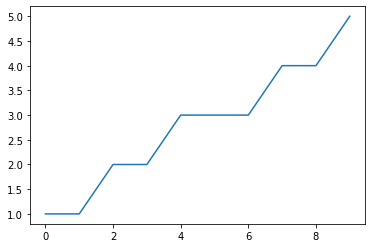

In [5]:
dice=sorted(dice)
plt.plot(dice)
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

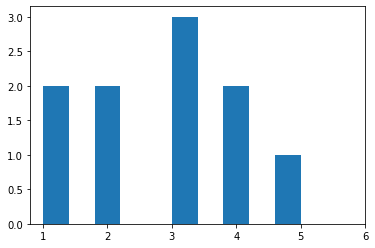

In [6]:

plt.hist(dice)
plt.xticks([1,2,3,4,5,6])
plt.show()


In [7]:
"""
the histogram shows the frequency of the values with the help of bins so discret whereas the plot is a continous line
connecting all points together. 
histogram gives an easier overview of how many times a number appeared from the dice, so it is the better 
graphical visualisation in my opnion. 
"""

'\nthe histogram shows the frequency of the values with the help of bins so discret whereas the plot is a continous line\nconnecting all points together. \nhistogram gives an easier overview of how many times a number appeared from the dice, so it is the better \ngraphical visualisation in my opnion. \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def mean (observation):
    """ This function calculates the mean from a list of observations"""
    my_sum=0
    count=0
    for element in observation:
     my_sum=my_sum+element
     count=count+1
    return my_sum/count



In [9]:
mean(dice)

2.8

In [10]:
np.mean(dice) #just to verify my result above :) 

2.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
my_dict={}
for element in dice:
   # checking the element in dictionary
   if element in my_dict:
      # incrementing the counr
     my_dict[element] += 1
   else:
      # initializing the count
      my_dict[element] = 1

my_dict


{1: 2, 2: 2, 3: 3, 4: 2, 5: 1}

In [12]:
def mean1 (dict):
    """ This function calculates the mean from a dictionary with frequency distributions"""
    my_sum=0
    count=0
    for key, values in dict.items():
        x=key*values
        my_sum=my_sum+x
        count=count+values
    return my_sum/count

In [13]:
mean1(my_dict)

2.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [14]:
# first check if len is even or odd 


def median (list):
    """ if len of list is even, we need to get the two values that are located in the middle by Indexing and add them up
    and divide them by 2. If the length of the list is odd we can get the value that has the central position by 
    dividing the length by 2 and substract -1 since indexing starts at 0 and with that index position call the 
    respective value from the list"""
    if len(list)%2==0:
       Index1=int((len(list)/2)-1)#since Index starts at 0 we need -1 to get the middle value
       Index2=Index1+1 #we need to get the value next to the one for Index1
       return (list[Index1]+list[Index2])/2
    else:
        Index3=int((len(list)/2)-1)
        return list[Index3]


In [15]:
median(dice)

3.0

In [16]:
np.median(dice) #validation of my calculation above

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
# José said we can leave that one out :) 

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [18]:
data=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\Descriptive-Stats\data\roll_the_dice_hundred.csv")
data.head(3)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6


In [19]:
counted_values=data['value'].value_counts()
counted_values.sort_index()

#number 6 was rolled the most, 1 and 5 the least


1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

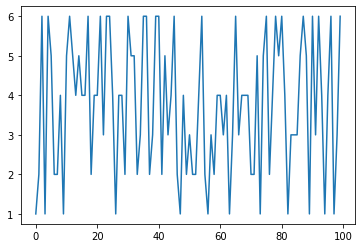

In [20]:
plt.plot(data["value"])
plt.show()

In [21]:
"""
this does not give me any insights - what is this haha?
"""

'\nthis does not give me any insights - what is this haha?\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [22]:
value=data["value"]
value_list=list(value)

In [23]:
mean(value_list)

3.74

#### 3.- Now, calculate the frequency distribution.


In [24]:
frequency_distribution=data['value'].value_counts()

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

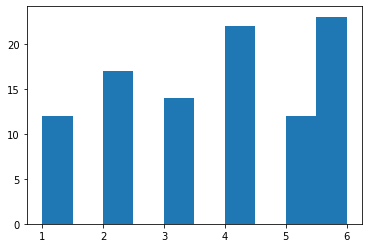

In [25]:
plt.hist(data["value"])
plt.show()

In [26]:
"""
this does give me insights. Six was rolled the most, followed by 4. 1 and 5 the least. 
The mean has a slight tendency towards "right". It is not exactly in the middle because 4 & 6 were rolled more often 
than 1, 2 and 3
"""

'\nthis does give me insights. Six was rolled the most, followed by 4. 1 and 5 the least. \nThe mean has a slight tendency towards "right". It is not exactly in the middle because 4 & 6 were rolled more often \nthan 1, 2 and 3\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [27]:
data=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\Descriptive-Stats\data\roll_the_dice_thousand.csv")
data.head(3)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1


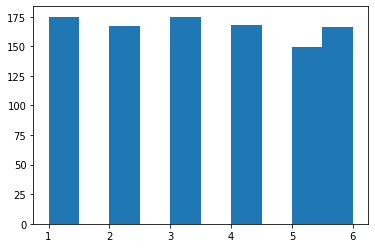

In [28]:
plt.hist(data["value"])
plt.show()

In [29]:
"""
The bars are more equal, so the values are more equally distributed which makes sense since in an ideal world 
with infinite rolls, the probability to roll a certain number is the same. So the more often you roll a dice
the more equally distributed should our values be.
"""

'\nThe bars are more equal, so the values are more equally distributed which makes sense since in an ideal world \nwith infinite rolls, the probability to roll a certain number is the same. So the more often you roll a dice\nthe more equally distributed should our values be.\n'

In [30]:
mean(data["value"]) #the mean was corrected towards left (The middle) compared to hundred rolls

3.447

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [31]:
data=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\Descriptive-Stats\data\ages_population.csv")
data.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


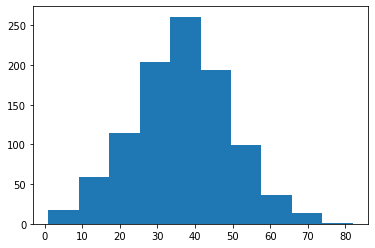

In [32]:
plt.hist(data["observation"])
plt.show()

My guess: 
Mean is between the range 35 and 45. 
Standard Deviation looks like is 10 years

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [33]:
observation=data["observation"]

In [34]:
np.mean(observation) #not too bad of a guess, what do you think Glady's? :D 

36.56

In [35]:
np.std(observation) #that was a close guess :D 

12.81008977329979

In [36]:
"""
yes they fall inside the range i guessed :) This looks like a standard distribution with most people being 
on average around 40 years old (the highest bar) and a range from 1 to 80-something. So the age distribution 
of this neighbourhood seems to follow the generela age distribution found in our population. """

'\nyes they fall inside the range i guessed :) This looks like a standard distribution with most people being \non average around 40 years old (the highest bar) and a range from 1 to 80-something. So the age distribution \nof this neighbourhood seems to follow the generela age distribution found in our population. '

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [37]:
data=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\Descriptive-Stats\data\ages_population2.csv")
data.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


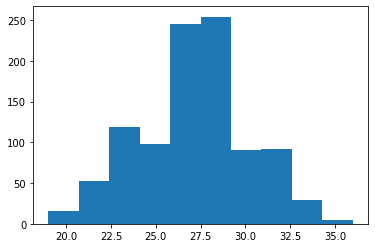

In [38]:
plt.hist(data["observation"])
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [39]:
"""
there is a difference. this distribution does not look like a normal distribution since the values for the peak
are much higher compared to the other values. Plus the distribution of age stagnates between 29 and 32.5 & 24 and 26,
with another peak left from the average, which probably moves our mean more to the left (younger age).
Also the total range of age is way smaller compared to the distribution in neighbourhood 1
starting by 18 up to 37 estimated. 
The population is much younger than the one surveyed above. 
"""

'\nthere is a difference. this distribution does not look like a normal distribution since the values for the peak\nare much higher compared to the other values. Plus the distribution of age stagnates between 29 and 32.5 & 24 and 26,\nwith another peak left from the average, which probably moves our mean more to the left (younger age).\nAlso the total range of age is way smaller compared to the distribution in neighbourhood 1\nstarting by 18 up to 37 estimated. \nThe population is much younger than the one surveyed above. \n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [40]:
observation=data["observation"]
np.mean(observation)

27.155

In [41]:
np.std(observation)

2.9683286543103704

In [42]:
"""
This neighbourhood has a very young population with people being on average 27 and a very small std from this value,
meaning there are not many people whose age differ from the average.
"""

'\nThis neighbourhood has a very young population with people being on average 27 and a very small std from this value,\nmeaning there are not many people whose age differ from the average.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [43]:
data=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\Descriptive-Stats\data\ages_population3.csv")
data.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [44]:
observation=data["observation"]
np.mean(observation)

41.989

In [45]:
np.std(observation)

16.136631587788084

In [46]:
"""
here the average age is the highest one compared to neighburhood 1 and 2 but it also has the highest std, 
indicating that there is a broader variety of ages too, and not as densiely populated by only young people like neighbourhood 2 or
concentrated around the mean like in neighbourhood 1.
"""

'\nhere the average age is the highest one compared to neighburhood 1 and 2 but it also has the highest std, \nindicating that there is a broader variety of ages too, and not as densiely populated by only young people like neighbourhood 2 or\nconcentrated around the mean like in neighbourhood 1.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [50]:
q1=np.quantile(observation, [0.25])
q2=np.quantile(observation, [0.5])
q3=np.quantile(observation, [0.75])
q4=np.quantile(observation, [1])

print(q1, q2, q3, q4)

[30.] [40.] [53.] [77.]


In [ ]:
"""from the quartiles we can see that 50% of my population in neigbourhood 3 fall between the age 40 & 53."""

In [53]:
# computing the difference between the mean and the median
np.mean(observation) -np.median(observation)

"""WE can see that the mean and median are located very close to each other, with the mean age being 1.9 years higher than
the median age"""

1.9889999999999972

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
"""we can have a look at the range, intequartile range, and have a boxplot without outliers to gain more insights 
about neighbourhood 3""" 


In [61]:
range=np.max(observation)-np.min(observation)
range 

76.0

In [57]:
#Interquartile Range + lower and upper bound

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print (iqr) 
print(lower_bound)
print(upper_bound)
       

[23.]
[-4.5]
[87.5]


In [ ]:
""" 
range: shows us the difference between highest and lowest value. We have an age range og 76 years in neighbourhood 3
showing that this is a very diverse neighbourhood with very young and very old people

IQR: measures the dispersion of the middle pack of data and is less sensitive to outliers
50% of my population is within a an age range of 23 years"""


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

'\nyour comments here\n'